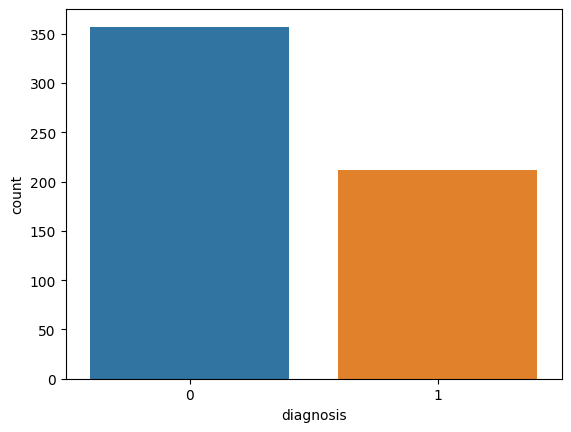

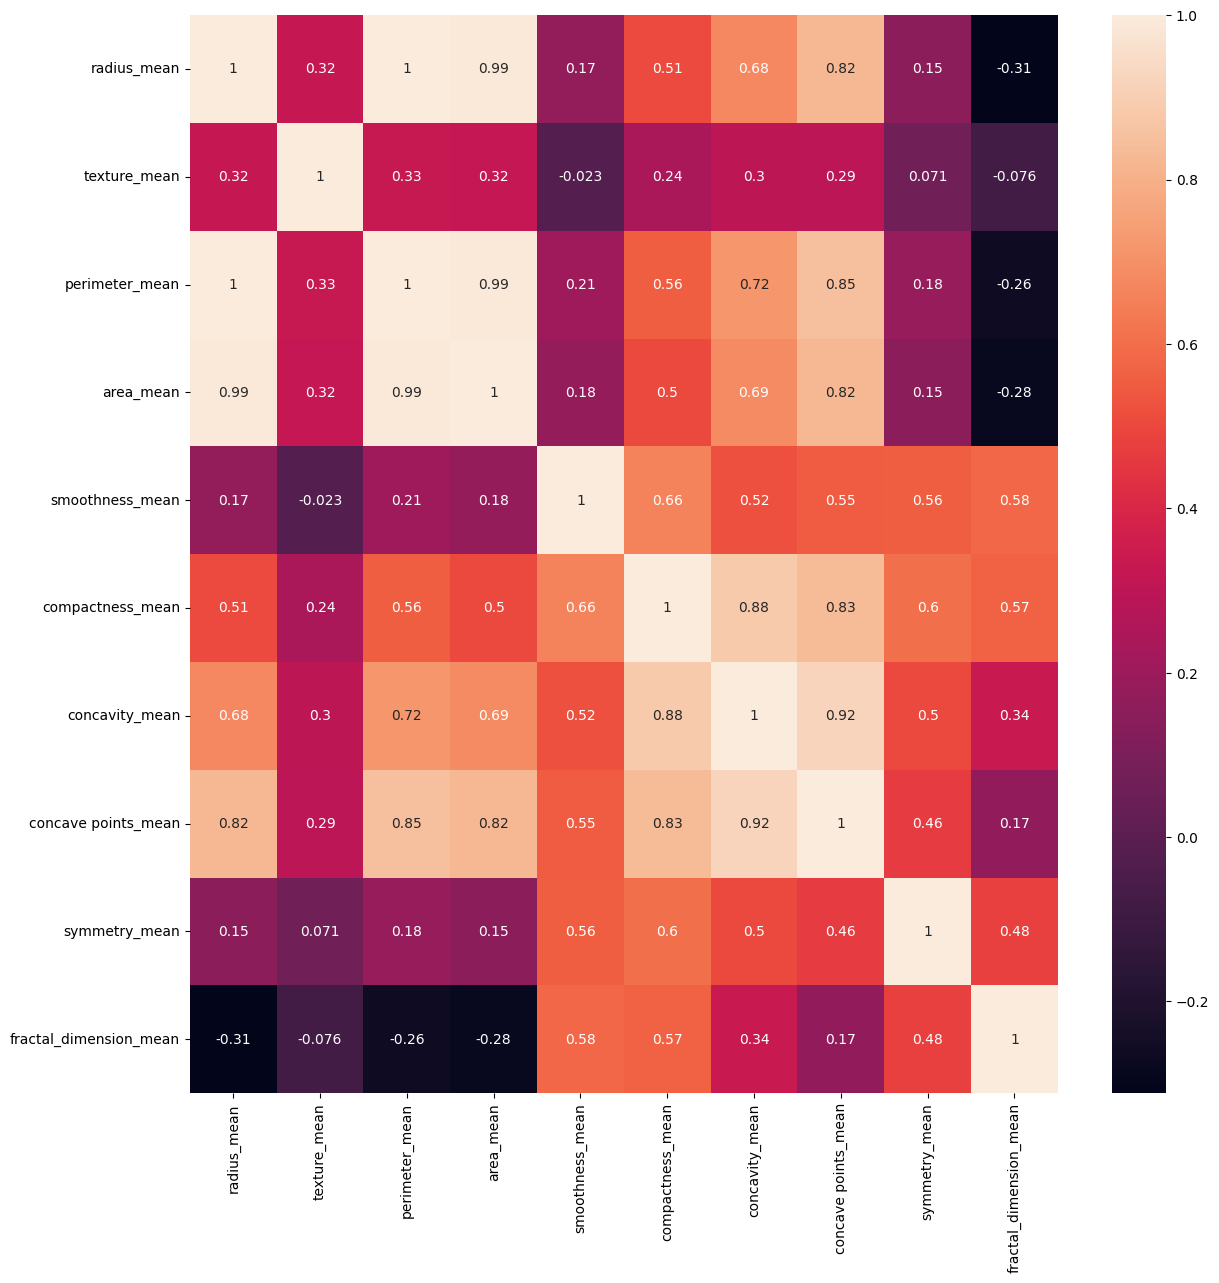

In [8]:
# Detection of breast cancer

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# load data 
data = pd.read_csv('./data/svc_data.csv')

# print(data.info())
# print(data.describe())
# print(data.head(5))
# print(data.columns)

# Divide the data into three groups
features_mean = list(data.columns[2:12])
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])

# cleaning the data
# drop the 'id' col
data.drop('id', axis = 1, inplace=True)

# change B to 0, M to 1
data['diagnosis'] = data['diagnosis'].map({'B':0, 'M':1})

# Visualize tumor diagnosis results
sns.countplot(x = data['diagnosis'], label='Count')
plt.show()

# Use a heat map to show the correlation between the features_mean fields
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))

# annot = True display the data of each square
sns.heatmap(corr, annot=True)
plt.show()

# Cut feature selection to 6
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean']

# use 30% data to tests, other to trains
train, test = train_test_split(data, test_size=0.3) # in this our main data is splitted into train and test

# Extract the value of feature slection as training and test data
train_X = train[features_remain]
train_y = train['diagnosis']
test_X = test[features_remain]
test_y = test['diagnosis']

# use Z-Score to normalize the data to ensure that the data mean of each feature dimension is 0, and the variance is 1
ss = StandardScaler()
train_x = ss.fit_transform(train_X)
test_x = ss.transform(test_X)


# create svm
model = svm.SVC()

# train data
model.fit(train_x, train_y)

# use the test set to make predictions
prediction = model.predict(test_x)
print('accuracy score is: ', metrics.accuracy_score(test_y, prediction))